In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PFS Survey Volume

In [52]:
def survey_volume(area, redshift, cosmo):
    """
    Return the comoving volume of a survey
    
    Parameters
    ==========
    area : array_like
        area in square degrees
    
    redshift : array_like
        redshift
    
    cosmo : astropy.cosmology object
        astropy cosmology object defining cosmology
    
    Returns
    =======
    volume : numpy.array
        volume of survey out to `redshift` in h^{-3}Mpc^3
    """
    survey_area = area/((np.pi*180.0)**2)
    
    V_c = cosmo.comoving_volume(redshift)
    
    return ((survey_area)/(4.0*np.pi))*V_c 

def survey_volume_between(area, redshift_a, redshift_b, cosmo):
    """
    Return the comoving volume of a survey between two redshifts
    
    Parameters
    ==========
    area : array_like
        area in square degrees
    
    redshift_a : array_like
        lower redshift
    
     redshift_b : array_like
        upper redshift
    
    cosmo : astropy.cosmology object
        astropy cosmology object defining cosmology
    
    Returns
    =======
    volume : numpy.array
        volume of survey out between `redshift_a` and `redshift_b` in h^{-3}Mpc^3
    """
    survey_area = area/((np.pi*180.0)**2)
    
    V_ca = cosmo.comoving_volume(redshift_a).value
    V_cb = cosmo.comoving_volume(redshift_b).value
    
    return ((survey_area)/(4.0*np.pi))*V_cb -  ((survey_area)/(4.0*np.pi))*V_ca

In [63]:
# examine volume as a function of redshift
# for possible survey areas

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70.0, Om0=0.3)
z = np.linspace(0.0,4.0,100)

survey_volume_a = survey_volume(5.0, z, cosmo)
survey_volume_b = survey_volume(10.0, z, cosmo)
survey_volume_c = survey_volume(15.0, z, cosmo)

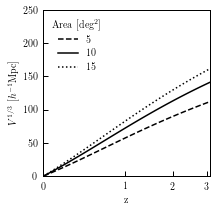

In [54]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = ax.plot(np.log10(1+z), (survey_volume_a)**(1/3.0), '--', color='black')
l2, = ax.plot(np.log10(1+z), (survey_volume_b)**(1/3.0), '-', color='black')
l3, = ax.plot(np.log10(1+z), (survey_volume_c)**(1/3.0), ':', color='black')
ax.set_ylabel(r'$V^{1/3}~[h^{-1}\rm Mpc]$')
ax.set_xlabel(r'z')
ax.set_ylim([0,250])
ax.set_xlim([np.log10(1),np.log10(4.1)])
ax.set_xticks(np.log10([1,2,3,4]))
ax.set_xticklabels(['0','1','2','3'])
ax.legend([l1,l2,l3],['5','10','15'], title ='Area ' + r'$[{\rm deg}^2]$',
          fontsize=10, loc='upper left', frameon=False)
plt.show()

In [64]:
# examine volume between z=1 and 2
# for possible survey areas

survey_volume_a = survey_volume_between(5.0,  1.0, 2.0, cosmo)
survey_volume_b = survey_volume_between(10.0, 1.0, 2.0, cosmo)
survey_volume_c = survey_volume_between(15.0, 1.0, 2.0, cosmo)

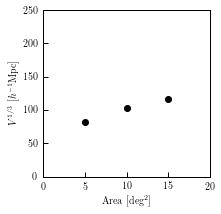

In [65]:
volumes = np.array([survey_volume_a, survey_volume_b, survey_volume_c])
volumes = volumes**(1/3)
areas = np.array([5,10,15])

fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = ax.plot(areas, volumes, 'o', color='black')
plt.ylim([0,250])
plt.xlim([0,20])
ax.set_ylabel(r'$V^{1/3}~[h^{-1}\rm Mpc]$')
ax.set_xlabel('Area ' + r'$[{\rm deg}^2]$')
plt.show()